In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import torch.nn.functional as F
import glob
import time
import matplotlib.pyplot as plt
from utils.architectures.autoreg import SimpleReg, ComplexReg, SimplestReg
from torch.nn.modules.loss import L1Loss

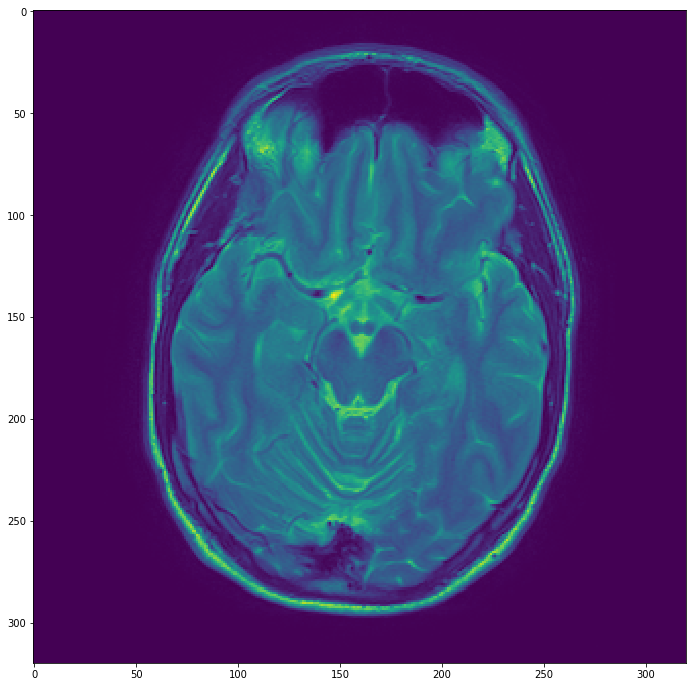

In [2]:
x = np.load("/mikQNAP/augmented_data/T2w/T2_norm_volunteer1_1.npy")
plt.figure(figsize=(12,12))
plt.imshow(x[0])
plt.show()

In [142]:
test1 = np.round(np.load("MRF_magnitude/MRF_norm_volunteer1_1.npy"),0)

In [143]:
f = np.load("/mikQNAP/augmented_data/T2w/T2_norm_volunteer1_2.npy")

In [144]:
f = (f-f.min())
f = f/f.max()
f = np.round(3*f, 0).astype(np.int)

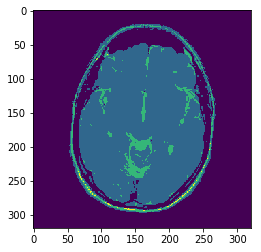

In [136]:
plt.imshow(f[0])

In [141]:
np.unique(f, return_counts=True)[1]

array([62766, 35515,  3940,   179])

In [138]:
1/(counts/np.sum(counts))

array([  1.63145652,   2.88328875,  25.98984772, 572.06703911])

In [139]:
counts

array([62766, 35515,  3940,   179])

In [145]:
f.shape

(1, 320, 320)

In [146]:
test1 = np.round(np.load("MRF_test_magnitude/MRF_norm_volunteer12_1.npy"),0)
